# Task 1 - Classification  

---

Universidade Federal do Rio de Janeiro  
Disciplina: Introdução a Aprendizado de Máquina  
Nome: Luiza Lissandra Rodrigues Rosa  
DRE: 119046349  
  
Classification Objective: To identify, among the customers who apply for a credit product (such as a credit card or a personal loan, for example) and who fulfill the essential prerequisites for credit approval, those who present a high risk of not able to honor the payment, becoming delinquent.

In [1]:
# Importing libraries and functions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
# All columns of the dataframe appear when it is displayed.

pd.options.display.max_columns = 999 

In [3]:
# Dataframe storage of data for training, testing and sample responses.

df_trainning = pd.read_csv('./conjunto_de_treinamento.csv')
df_teste = pd.read_csv('./conjunto_de_teste.csv')
ex_resposta = pd.read_csv('./exemplo_arquivo_respostas.csv')

Data pre-processing.

In [4]:
# Looking at categories with NULL Values in Test and Training Sets.

aux = df_trainning.isnull().sum(axis = 0)
print("Conjunto de Treinamento\n")
print(aux[aux != 0])

aux = df_teste.isnull().sum(axis = 0)
print("\nConjunto Teste\n")
print(aux[aux != 0])

Conjunto de Treinamento

tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64

Conjunto Teste

tipo_residencia                125
meses_na_residencia            362
profissao                      762
ocupacao                       690
profissao_companheiro         2887
grau_instrucao_companheiro    3210
dtype: int64


In [5]:
df_trainning

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,estado_onde_nasceu,estado_onde_reside,possui_telefone_residencial,codigo_area_telefone_residencial,tipo_residencia,meses_na_residencia,possui_telefone_celular,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,1,CE,CE,Y,107,1.0,12.0,N,0,480.0,0.0,0,0,0,0,0,1,1,0.0,1,N,,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,1,SE,SE,Y,91,1.0,5.0,N,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,1,BA,BA,Y,90,5.0,1.0,N,1,600.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,1,RS,RS,Y,54,1.0,1.0,N,1,460.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,RS,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,1,BA,BA,Y,86,0.0,1.0,N,1,687.0,600.0,0,0,0,0,0,0,0,0.0,1,Y,BA,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,10,presencial,1,M,27,2,0,0,1,MG,MG,Y,29,2.0,0.0,N,1,423.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,N,,0,9.0,1.0,0.0,0.0,308.0,308.0,0
19996,19997,1,20,presencial,1,F,26,2,1,0,1,CE,CE,Y,107,1.0,3.0,N,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,N,,0,9.0,2.0,0.0,0.0,639.0,639.0,0
19997,19998,1,10,internet,1,F,63,2,0,0,1,BA,BA,Y,86,5.0,25.0,N,1,321.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,9.0,1.0,NaN,NaN,486.0,486.0,0
19998,19999,1,5,internet,1,F,84,1,0,0,1,PB,RN,N,,1.0,30.0,N,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,NaN,NaN,NaN,NaN,590.0,590.0,0


In [6]:
print (df_trainning.describe(include="all"))

        id_solicitante  produto_solicitado  dia_vencimento  \
count     20000.000000        20000.000000    20000.000000   
unique             NaN                 NaN             NaN   
top                NaN                 NaN             NaN   
freq               NaN                 NaN             NaN   
mean      10000.500000            1.284350       13.147250   
std        5773.647028            1.008239        6.748507   
min           1.000000            1.000000        1.000000   
25%        5000.750000            1.000000       10.000000   
50%       10000.500000            1.000000       10.000000   
75%       15000.250000            1.000000       20.000000   
max       20000.000000            7.000000       25.000000   

       forma_envio_solicitacao  tipo_endereco   sexo         idade  \
count                    20000   20000.000000  20000  20000.000000   
unique                       3            NaN      4           NaN   
top                   internet            NaN

Removal of variables/columns because:

- The "grau_instrução_companheiro" and "profissao_companheiro" categories because they have many NULL values; 

- The field "qtde_contas_bancarias_especiais" appears to be identical to the previous "qtde_contas_bancarias"; 

- "possui_telefone_celular" had almost all responses equal to "N" and "grau_instrucao", equal to "0"; 

- "id_solicitante" doesn't give us any useful information.

Everything that is done with the training information, is done with the test.

In [7]:
df_trainning = df_trainning.drop(columns=['id_solicitante','profissao_companheiro','grau_instrucao_companheiro', 'qtde_contas_bancarias_especiais', 'possui_telefone_celular', 'grau_instrucao'])
df_teste = df_teste.drop(columns = ['id_solicitante','profissao_companheiro','grau_instrucao_companheiro', 'qtde_contas_bancarias_especiais', 'possui_telefone_celular', 'grau_instrucao'])

Replacing the fields with 'NAN' for a third option "other" and, in the case of the number of months in the residence, for "0".

In [8]:
df_trainning['tipo_residencia'] = df_trainning['tipo_residencia'].fillna(6)
df_trainning['meses_na_residencia'] = df_trainning['meses_na_residencia'].fillna(0)
df_trainning['profissao'] = df_trainning['profissao'].fillna(19)
df_trainning['ocupacao'] = df_trainning['ocupacao'].fillna(6)

df_teste['tipo_residencia'] = df_teste['tipo_residencia'].fillna(6)
df_teste['meses_na_residencia'] = df_teste['meses_na_residencia'].fillna(0)
df_teste['profissao'] = df_teste['profissao'].fillna(19)
df_teste['ocupacao'] = df_teste['ocupacao'].fillna(6)

In [9]:
# Division into States to simplify through a dictionary.

dicio = {'RJ':'Sudeste',
         'SP':'Sudeste',
         'MG':'Sudeste',
         'ES':'Sudeste',
         'BA':'Nordeste',
         'SE':'Nordeste',
         'AL':'Nordeste',
         'PE':'Nordeste',
         'PB':'Nordeste',
         'RN':'Nordeste',
         'CE':'Nordeste',
         'PI':'Nordeste',
         'MA':'Nordeste',
         'RO':'Norte',
         'TO':'Norte',
         'PA':'Norte',
         'AP':'Norte',
         'RR':'Norte',
         'AM':'Norte',
         'AC':'Norte',
         'MS':'Centro_Oeste',
         'MT':'Centro_Oeste',
         'GO':'Centro_Oeste',
         'DF':'Centro_Oeste',
         'RS':'Sul',
         'SC':'Sul',
         'PR':'Sul'}

df_trainning = df_trainning.replace(dicio)
df_teste = df_teste.replace(dicio)

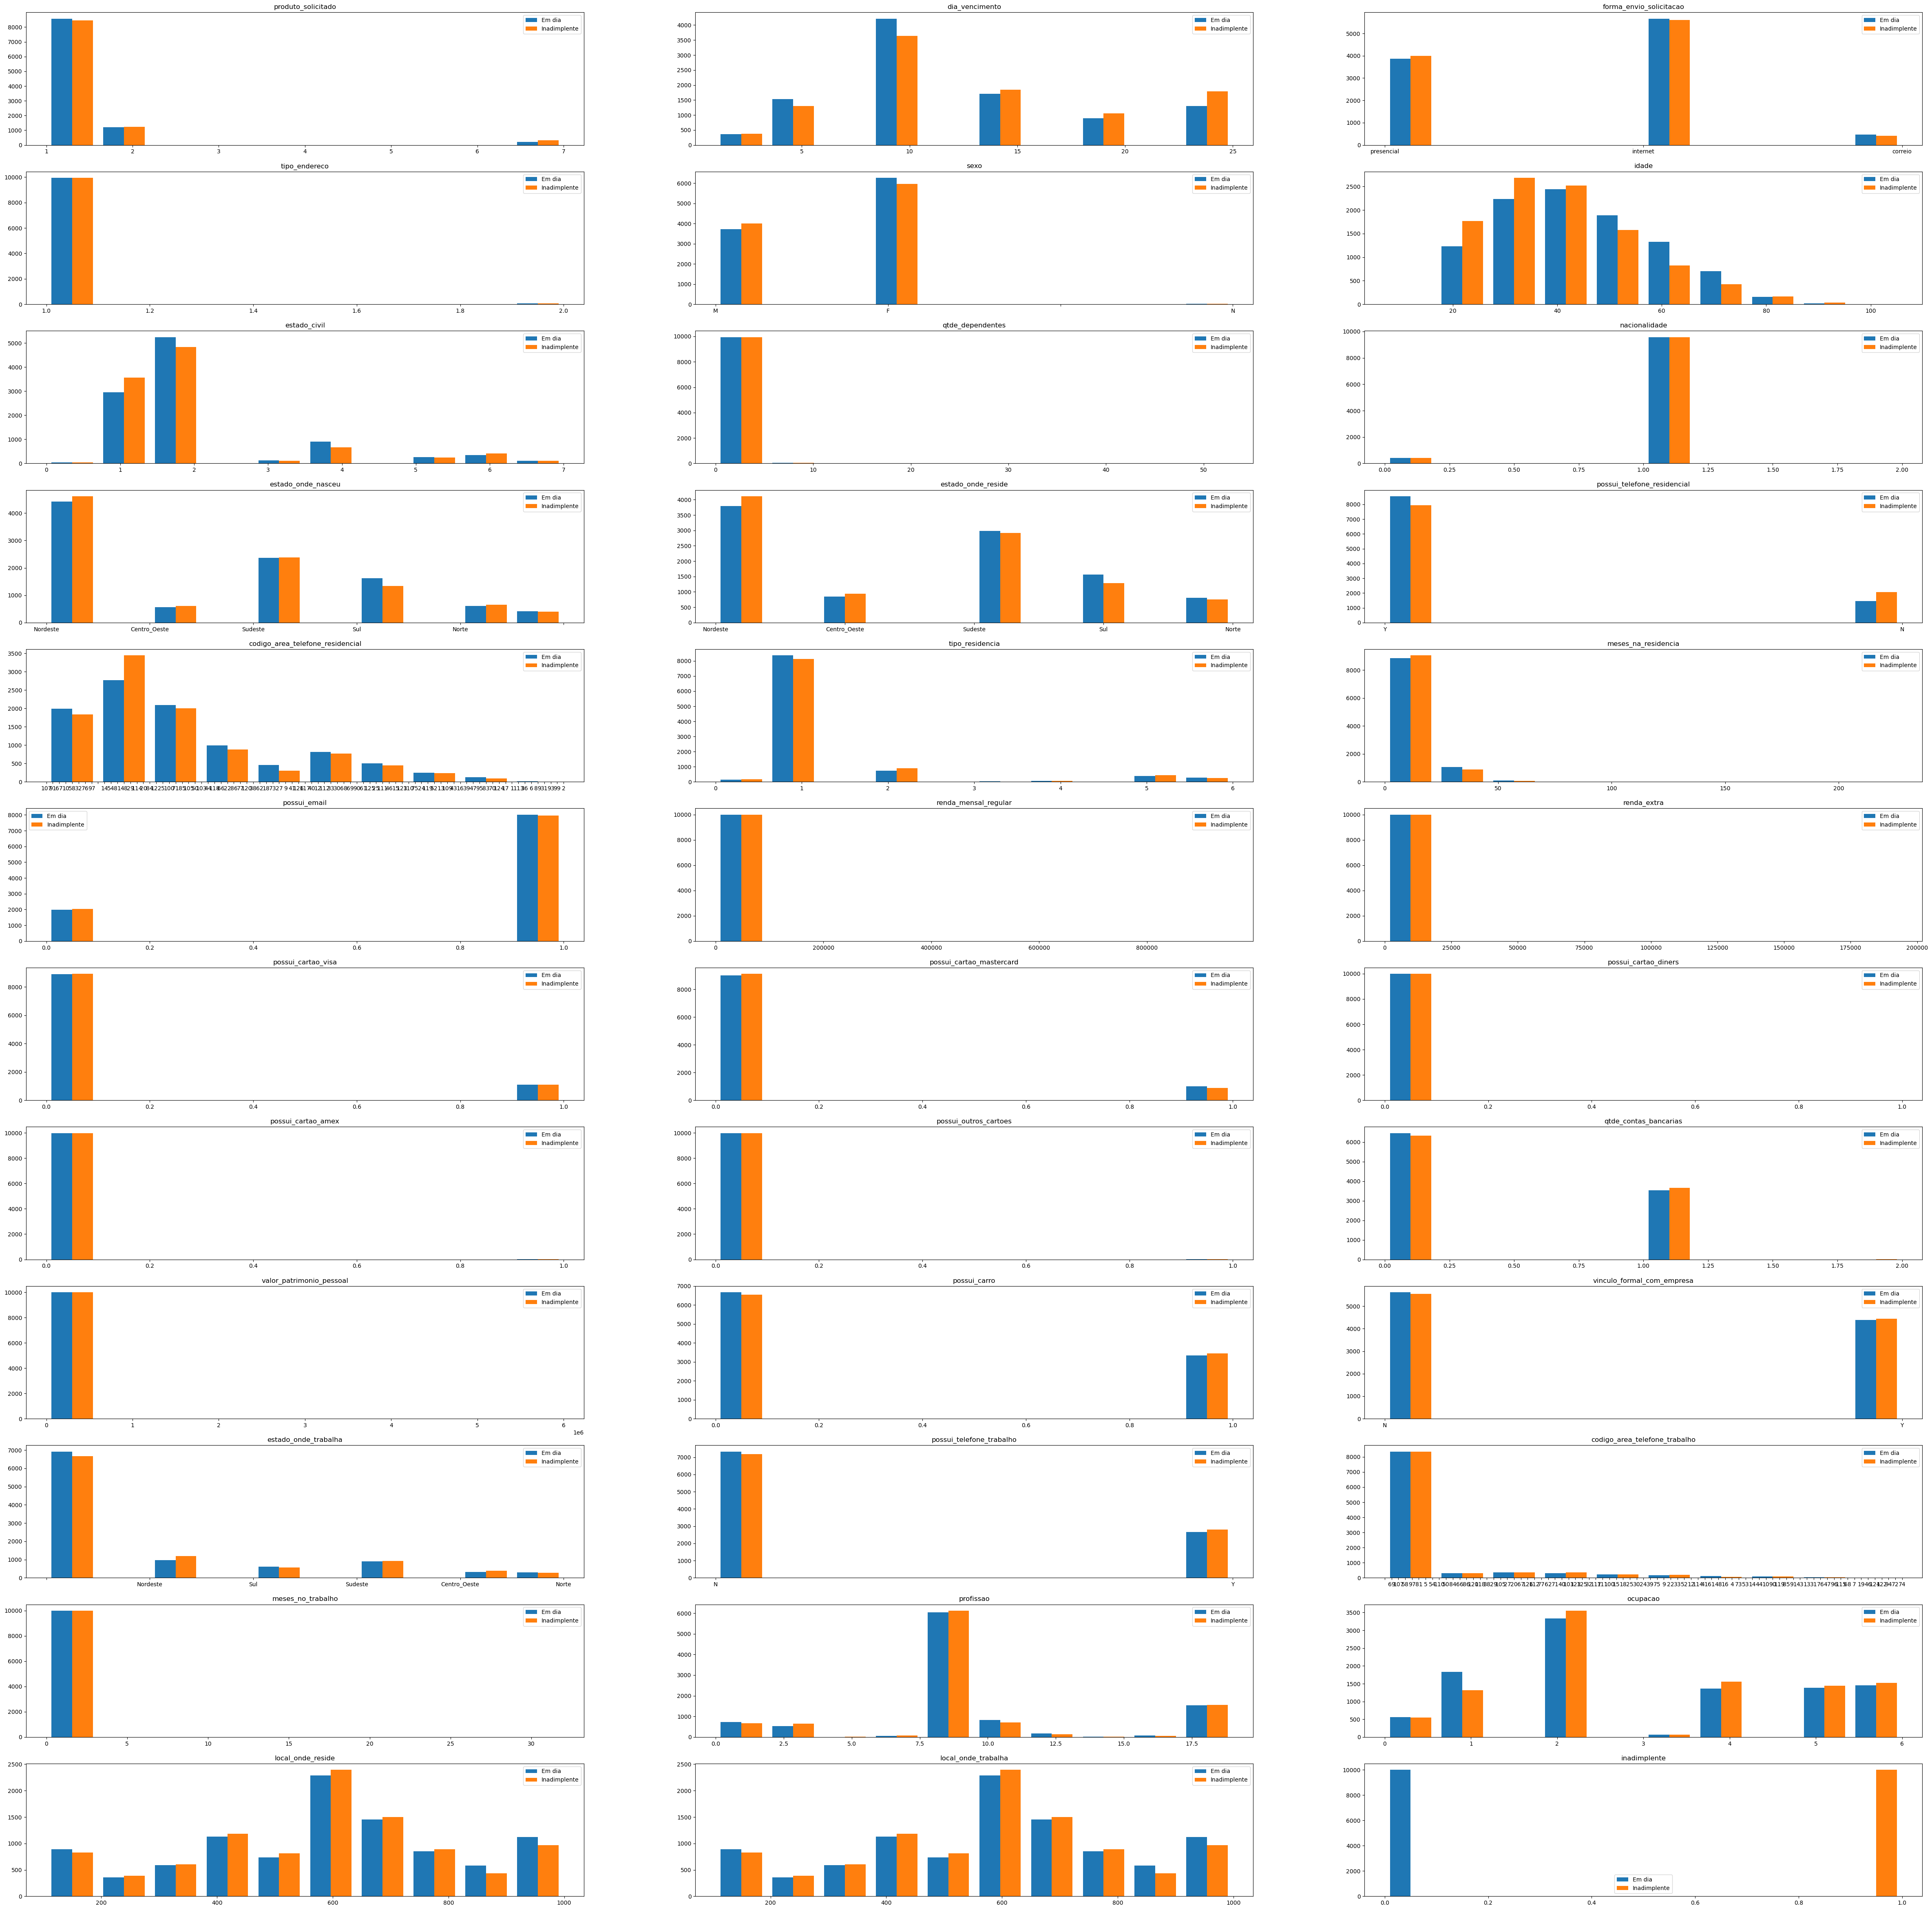

In [10]:
# Graphs that show the relationship between each category and the target variable of defaulting or not.

fig = plt.figure(figsize = (60, 60))
categorias = df_trainning.columns
count = 1

for aux in range (categorias.size): 
    
    plt.subplot (categorias.size//3,3,count)

    em_dia = df_trainning[df_trainning['inadimplente']==0][categorias[aux]]
    
    inadimplente = df_trainning[df_trainning['inadimplente']==1][categorias[aux]]

    plt.hist([em_dia,inadimplente])
    
    plt.legend(['Em dia', 'Inadimplente'])

    plt.title(categorias[aux])
    
    count += 1

    plt.show

Initially, it is not possible to observe which categories have a similar behavior to each other or whether they do not influence the result.

In [11]:
print(df_trainning.dtypes)

produto_solicitado                    int64
dia_vencimento                        int64
forma_envio_solicitacao              object
tipo_endereco                         int64
sexo                                 object
idade                                 int64
estado_civil                          int64
qtde_dependentes                      int64
nacionalidade                         int64
estado_onde_nasceu                   object
estado_onde_reside                   object
possui_telefone_residencial          object
codigo_area_telefone_residencial     object
tipo_residencia                     float64
meses_na_residencia                 float64
possui_email                          int64
renda_mensal_regular                float64
renda_extra                         float64
possui_cartao_visa                    int64
possui_cartao_mastercard              int64
possui_cartao_diners                  int64
possui_cartao_amex                    int64
possui_outros_cartoes           

Removing the "codigo_area_telefone_trabalho" and "codigo_area_telefone_residencial" that do not aggregate new information, since we already have the "local_onde_reside" column.

In [12]:
df_teste = df_teste.drop(columns = ['codigo_area_telefone_trabalho'])
df_trainning = df_trainning.drop(columns = ['codigo_area_telefone_trabalho'])

df_teste = df_teste.drop(columns = ['codigo_area_telefone_residencial'])
df_trainning = df_trainning.drop(columns = ['codigo_area_telefone_residencial'])

In [13]:
# Using one hot encoding to convert categorical variables into numeric.

categorias = df_trainning.columns

for aux in ['forma_envio_solicitacao',
            'sexo',
            'possui_telefone_residencial',
            'estado_onde_nasceu',
            'estado_onde_reside',
            'vinculo_formal_com_empresa',
            'estado_onde_trabalha',
            'possui_telefone_trabalho']:
  
    one_hot = pd.get_dummies(df_teste[aux], prefix=aux)
    df_teste = df_teste.drop(columns=[aux])
    df_teste = df_teste.join(one_hot)
  
    one_hot = pd.get_dummies(df_trainning[aux], prefix=aux)
    df_trainning = df_trainning.drop(columns=[aux])
    df_trainning = df_trainning.join(one_hot)

To facilitate the choice of variables, other than by trial and error, the class "SelectKbest" was used, which selects the variables that most influence the result of the classification. This makes the model simpler and improves the processing performance of an extensive dataset.  

In [14]:
y_train = df_trainning[['inadimplente']]
x_train = df_trainning.drop(columns = ['inadimplente'])

seletor = SelectKBest(chi2, k=35)
seletor.fit(x_train,y_train)
x_train = seletor.transform(x_train)
x_teste = df_teste.copy()

x_teste = seletor.transform(x_teste)

# In addition, the scale adjustment was done using the "RobustScaller", which also acts by treating outliers.

scaler = RobustScaler()

scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)
x_teste = scaler.transform(x_teste)

In [15]:
# Dividing the trainning dataset to use 20% of it as a test.

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 9)

"HalvingGridSearchCV" was used to facilitate the choice of hyperparameters for the model that uses random forest.

In [16]:
aux = score = 0
hiper = []

'''A loop is created to go on adding the best combinations 
of hypervalues to get the best score. The two best scores are used for testing.'''

while len (hiper) < 2:
    base_estimator = RandomForestClassifier(random_state = 9, oob_score = True)
    param_grid = {'n_estimators': [40, 45],
                  'criterion': ['gini'],
                  'max_depth': [20, 25],
                  'min_samples_split': [0.009, 0.01],
                  'min_samples_leaf': [0.009, 0.01],
                  'max_features': [None,'sqrt']}

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        halving = HalvingGridSearchCV(base_estimator, param_grid,cv=2).fit(x_train, y_train)

    hiperparametro = halving.best_estimator_

    clf= hiperparametro
    clf.fit(x_train, y_train)
    aux = clf.score(x_val, y_val)

    if aux > score:
        score = aux
        hiper.append(hiperparametro)
        print (score)

0.5813333333333334
0.5828333333333333


In [17]:
print(hiper) 

[RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=0.009,
                       min_samples_split=0.01, n_estimators=40, oob_score=True,
                       random_state=9), RandomForestClassifier(max_depth=20, max_features='sqrt',
                       min_samples_leaf=0.009, min_samples_split=0.01,
                       n_estimators=45, oob_score=True, random_state=9)]


In [18]:
clf =  RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=0.01, min_samples_split=0.009,
                              n_estimators=40, oob_score=True, random_state=9)

clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.5845

Testing with the KNN Classifier.  

Analysis: The number of neighbors that generated the best score was 20. I found this number by trial and error.

In [19]:
neigh = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=60,
                             p=2, metric='minkowski', metric_params=None, n_jobs=None)
neigh.fit(x_train, y_train)
neigh.score(x_val, y_val)

C:\Users\luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5403333333333333

Analysis: After attempts to adjust the hyperparameters, it's evident that the model using Random Forest performed better.

Saving the results obtained with KNN and Random Forest.

In [20]:
y_rnd_forest = clf.predict(x_teste)

aux = pd.read_csv('./conjunto_de_teste.csv')
resposta_rnd_forest = pd.DataFrame({'id_solicitante':aux.pop('id_solicitante'), 'inadimplente':np.squeeze(np.int16(y_rnd_forest))})
resposta_rnd_forest.to_csv('./classification_answer_rnd_forest.csv', index=False)

In [21]:
y_knn = neigh.predict(x_teste)

aux = pd.read_csv('./conjunto_de_teste.csv')
resposta_knn = pd.DataFrame({'id_solicitante':aux.pop('id_solicitante'), 'inadimplente':np.squeeze(np.int16(y_knn))})
resposta_knn.to_csv('./classification_answer_knn.csv', index=False)

C:\Users\luiza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Bibliografia: <br>
    - <a href="https://scikit-learn.org/stable/index.html">Scikit-learn</a>